In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [9]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [10]:
df.isnull().any()

holiday                False
temp                   False
rain_1h                False
snow_1h                False
clouds_all             False
weather_main           False
weather_description    False
date_time              False
traffic_volume         False
dtype: bool

In [11]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [12]:
df.loc[df['date_time']==10]["traffic_volume"]


Series([], Name: traffic_volume, dtype: int64)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df[['weather_main', 'weather_description']]:
    df[col] = le.fit_transform(df[col] )
i = 0

def conv_time(row):
    index = row['date_time']
    time = row['date_time'].split(' ')
    h = time[1].split(':')
    row['date_time'] = int(h[0])
    row['traffic_volume'] = row['traffic_volume'] + 1
    row['traffic_volume'] = (row['traffic_volume'] / 1000)
    return row

df = df.apply(conv_time, axis=1)

print(i)

0


In [14]:
Q = []
for i in range(0, 24):
    temp_mean =  df.loc[df['date_time'] == i]
    temp = []
    temp.append(temp_mean['traffic_volume'].quantile(0.1))
    temp.append(temp_mean['traffic_volume'].mean())
    temp.append(temp_mean['traffic_volume'].quantile(0.9))
    #print(temp)
    Q.append(temp)
    #if df.loc[df['date_time']==i]["traffic_volume"]<=2:
    #    df.loc[df['date_time']==i]["traffic_volume"]=temp_mean

#mean

In [15]:
holiday_i = 0
def data_procces(row):
    global holiday_i
    global Q
    if holiday_i > 0:
        row['holiday'] = 1
        holiday_i = holiday_i + 1
        if holiday_i > 24:
            holiday_i = 0
    else:
        if row['holiday'] == 'None':
            row['holiday'] = 0
        else:
            row['holiday'] = 1
            holiday_i = 1
    if int(row['rain_1h']) > 28:
        row['rain_1h'] = 28
    else:
        row['rain_1h'] = int(row['rain_1h'])
    row['snow_1h'] = int(row['snow_1h'] * 60)
    row['temp'] = row['temp'] - 273.15
    if row['temp'] < -28:
        row['temp'] = -28
    
    for i in range(0, 24):
        if row['date_time'] == i:
            if  row['traffic_volume'] > Q[i][2]:
                    row['traffic_volume'] = Q[i][2]
            if  row['traffic_volume'] < Q[i][0]:
                    row['traffic_volume'] = Q[i][0]


    return row
df = df.apply(data_procces, axis=1)

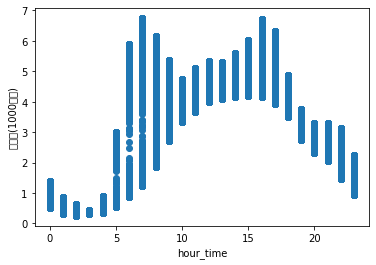

In [41]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) # 步驟二
plt.clf()
plt.scatter(df['date_time'], df['traffic_volume'])
plt.xlabel('hour_time')
plt.ylabel('交通量(1000單位)', fontproperties=font)    
plt.show()

In [18]:
df['date_time'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7], dtype=int64)

In [19]:
#import pandas_profiling
#df.profile_report()

In [20]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,15.13,0,0,40,1,24,9,5.3706
1,0,16.21,0,0,75,1,2,10,4.5170
2,0,16.43,0,0,90,1,19,11,4.7680
3,0,16.98,0,0,90,1,19,12,5.0270
4,0,17.99,0,0,75,1,2,13,4.9190
...,...,...,...,...,...,...,...,...,...
48199,0,10.30,0,0,75,1,2,19,3.5440
48200,0,9.61,0,0,90,1,19,20,2.7820
48201,0,9.58,0,0,90,10,21,21,2.1600
48202,0,8.94,0,0,90,1,19,22,1.4610


In [21]:
X = df.drop(["traffic_volume", "weather_description"], axis = 1)
y = df['traffic_volume']

In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,mean_absolute_percentage_error,mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state=5555)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

rmse=mean_squared_error(y_test, y_pred,squared=False)
mape=mean_absolute_percentage_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("rmse:",rmse)
print("mape:",mape)
print("mae:",mae)

rmse: 1.1396197315703795
mape: 0.3340586101551788
mae: 0.7513011363073212


## rmse: 1.1714896489507909
## mape: 434277062749.8188
## mae: 0.801886877496137
---
# 節慶補1
## rmse: 1.1898729684808564
## mape: 399188170630.288
## mae: 0.8001534356761575
---
## rmse: 1.1792037909977606
## mape: 399102962961.83484
## mae: 0.7928227161823584

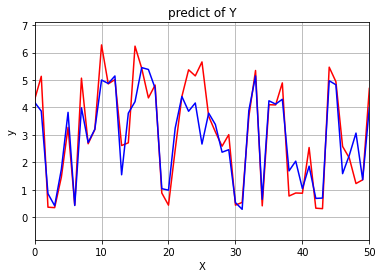

In [23]:
act_y = y_test.values
pre_y = y_pred

plt.plot(act_y, color='r')
plt.plot(pre_y, color="b")
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 50])
plt.grid(True)

plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state=5555)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

xgbc = xgb.XGBRegressor()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("rmse:", rmse)
print("mape:", mape)
print("mae:", mae)

rmse: 0.8405609821372673
mape: 0.28191495809398326
mae: 0.5568929460260924


## rmse: 0.9136807914979319
## mape: 496238893914.43134
## mae: 0.6169874967379254
---
## rmse: 0.9029817920844271
## mape: 512286107283.3304
## mae: 0.6078896377553528
---
# 節慶補1
## rmse: 0.9032464445367573
## mape: 519870940233.7136
## mae: 0.6074117166928117
---
#
## rmse: 0.8961115089332629
## mape: 503193677554.79236
## mae: 0.6009526593559518

In [25]:
x_test = sc.inverse_transform(X_test)

In [26]:
date_time = []
temp = []
for i in x_test:
    date_time.append(i[6])
    temp.append(i[1])


In [27]:
s = pd.DataFrame(x_test)
s[6].unique()

array([18.,  9.,  3.,  1., 22., 19., 17., 21., 20., 16., 15.,  5., 14.,
       12.,  4., 10.,  7.,  2.,  0., 13.,  6., 23.,  8., 11.])

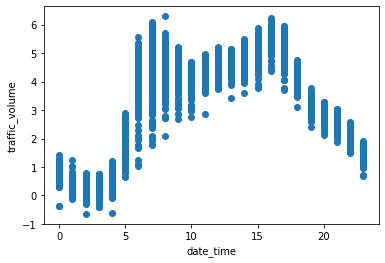

In [28]:
plt.clf()
plt.scatter(date_time, y_pred)
plt.xlabel('date_time')
plt.ylabel('traffic_volume')    
plt.show()

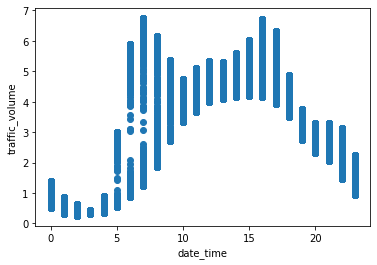

In [29]:
plt.clf()
plt.scatter(date_time, y_test)
plt.xlabel('date_time')
plt.ylabel('traffic_volume')    
plt.show()

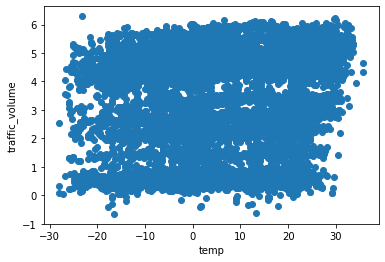

In [30]:
plt.clf()
plt.scatter(temp, y_pred)
plt.xlabel('temp')
plt.ylabel('traffic_volume')    
plt.show()

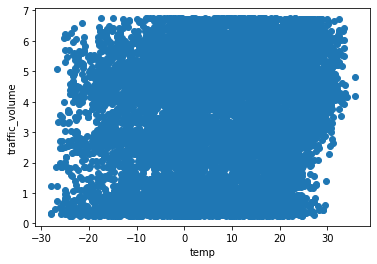

In [31]:
plt.clf()
plt.scatter(temp, y_test)
plt.xlabel('temp')
plt.ylabel('traffic_volume')    
plt.show()

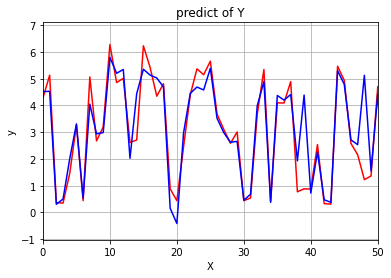

In [32]:
act_y = y_test.values
pre_y = y_pred

plt.plot(act_y, color='r')
plt.plot(pre_y, color="b")
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 50])
plt.grid(True)

plt.show()

In [35]:
len(X_test)

14462

In [37]:
len(X_train)

33742